<ipython-input-7-e02a4718057b>:15: RuntimeWarning: overflow encountered in scalar add
  m1 = -(2/n)*sum(x*(y-yhat))
<ipython-input-7-e02a4718057b>:17: RuntimeWarning: invalid value encountered in scalar subtract
  m = m-lr*m1


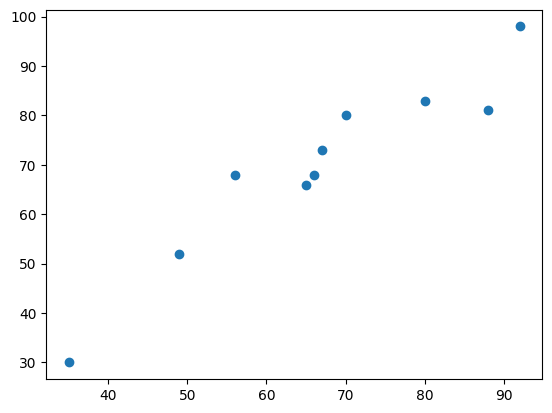

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Y(m,x,b):
    return m*x+b

def regression(x,y):
    m, b, n = 1, 1, len(x)
    epokhs = 1000
    lr = 0.01

    for epok in range(epokhs):
        yhat = Y(m,x,b)
        m1 = -(2/n)*sum(x*(y-yhat))
        b1 = -(2/n)*sum(y-yhat)
        m = m-lr*m1
        b = b-lr*b1
    return m,b

data = pd.read_csv('/content/est_scores.csv')
data.drop(['name'], axis=1, inplace=True)

x = np.array(data['math'].tolist())
y = np.array(data['cs'].tolist())

m,b = regression(x,y)

y1 = Y(m,35,b)
y2 = Y(m,92,b)

plt.scatter(x,y)
plt.plot([35,92], [y1,y2])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

def predict_using_sklean():
    df = pd.read_csv("test_scores.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 1000000
    n = len(x)
    learning_rate = 0.0002

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr, b_curr

if __name__ == "__main__":
    df = pd.read_csv("/content/est_scores.csv")
    x = np.array(df.math)
    y = np.array(df.cs)

    m, b = gradient_descent(x,y)
    print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

    m_sklearn, b_sklearn = predict_using_sklean()
    print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

Streaming output truncated to the last 5000 lines.
m 1.0177384013109885, b 1.9150659927837017, cost 31.604511334879064, iteration 410534
m 1.0177384012613204, b 1.9150659963035586, cost 31.60451133487899, iteration 410535
m 1.017738401211653, b 1.9150659998233346, cost 31.60451133487895, iteration 410536
m 1.0177384011619872, b 1.9150660033430298, cost 31.604511334878886, iteration 410537
m 1.0177384011123225, b 1.9150660068626444, cost 31.60451133487882, iteration 410538
m 1.0177384010626587, b 1.9150660103821782, cost 31.604511334878765, iteration 410539
m 1.0177384010129964, b 1.9150660139016311, cost 31.604511334878694, iteration 410540
m 1.0177384009633348, b 1.9150660174210032, cost 31.60451133487865, iteration 410541
m 1.017738400913675, b 1.9150660209402945, cost 31.60451133487858, iteration 410542
m 1.0177384008640151, b 1.915066024459505, cost 31.604511334878516, iteration 410543
m 1.0177384008143582, b 1.9150660279786347, cost 31.60451133487846, iteration 410544
m 1.01773840

FileNotFoundError: [Errno 2] No such file or directory: 'test_scores.csv'

In [ ]:
data= pd.read_csv('/content/carprices.csv')
data.head(10)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
dummy = pd.get_dummies(data['Car Model']).astype(int)

In [ ]:
dummy.drop(['Mercedez Benz C class'], axis=1, inplace=True)

In [ ]:
data.drop(['Car Model'],axis = 'columns', inplace = True)

In [ ]:
merged = pd.concat([data,dummy], axis = 'columns')

In [ ]:
from sklearn import linear_model

In [ ]:
merged

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


from matplotlib import pyplot as plt
merged['Mileage'].plot(kind='hist', bins=20, title='Mileage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged['Sell Price($)'].plot(kind='hist', bins=20, title='Sell Price($)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged['Age(yrs)'].plot(kind='hist', bins=20, title='Age(yrs)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged['Audi A5'].plot(kind='hist', bins=20, title='Audi A5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged.plot(kind='scatter', x='Mileage', y='Sell Price($)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged.plot(kind='scatter', x='Sell Price($)', y='Age(yrs)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged.plot(kind='scatter', x='Age(yrs)', y='Audi A5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged.plot(kind='scatter', x='Audi A5', y='BMW X5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged['Mileage'].plot(kind='line', figsize=(8, 4), title='Mileage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
merged['Sell Price($)'].plot(kind='line', figsize=(8, 4), title='Sell Price($)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
merged['Age(yrs)'].plot(kind='line', figsize=(8, 4), title='Age(yrs)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
merged['Audi A5'].plot(kind='line', figsize=(8, 4), title='Audi A5')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
obj = linear_model.LinearRegression()
obj.fit(merged[['Mileage','Age(yrs)','Audi A5','BMW X5']], merged['Sell Price($)'])

LinearRegression()

In [ ]:
obj.predict([[86000,7,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])